In [3]:
# Importing the libraries
import numpy as np
from PIL import ImageTk
import PIL.Image
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from tkinter import *
from tkinter import filedialog
from speak import speak, save_mp3
import os

global img_id
global storage
storage='input_database.csv'

bgcolor='black'
color='#00ff00'
inactive='#98AFC7'


global pred_op
pred_op=''

win = Tk()
win.title('Handwritten Numeral Image Recognizer')
speak('Welcome to Handwritten Numeral Image Recognizer')

win.geometry("1217x690")
win.resizable(False,False)

sb =Scrollbar(win, orient="vertical")
#, command=win.yview)  

sb.grid(row=0 , column=3, sticky='ns', in_=win)  
#sb.configure(command = win.yview )  
#mylist = Listbox(win, yscrollcommand = sb.set )  
  
#for line in range(100):  
#    mylist.insert(END, "Number " + str(line))    
 #   mylist.grid(row=0, column=3 )  
    


#scroll_bar = Scrollbar(win,orient=VERTICAL)
#scroll_bar.config(command=win.yview)
#photoCanvas.config(yscrollcommand=photoScroll.set)
#scroll_bar.pack()
#scroll_bar.grid(row=0, column=3, sticky="ns")

win.iconbitmap(r'ANS_icon.ico')

logo=PhotoImage(file="ANS_logo.png", master=win)
logo_label=Label(win,image=logo,compound=CENTER,background=color)
logo_label.grid(row=0,column=0,columnspan=3)
win.configure(background=bgcolor)

global location
global my_image_label
#global i_m_processed
global dimension_label
global IP_label
global train_label
global pred_label
global train_button
sc = StandardScaler()
classifier = SVC(kernel = 'rbf',gamma='scale', random_state = 0)


def browse():
    global my_image
    global location
    global height
    global width
    win.filename = filedialog.askopenfilename(initialdir="/This PC", title="Select a Image", filetypes=(("jpg files", "*.jpg"),("png files", "*.png"),("all files","*.*")))
    
    #my_label = Label(win, text=win.filename).pack()
    print(win.filename)
    my_image = ImageTk.PhotoImage(PIL.Image.open(win.filename))
    my_image_label.config(image=my_image)#.resize((50,50)))
    
    location = win.filename.replace("/","\\")
    c=cv2.imread(location)
    dimensions = c.shape
    height = c.shape[0]
    width = c.shape[1] 
    dimension_label.config(text='Image Selected: '+location+'\nDimensions: '+str(width)+' x '+str(height),foreground=color)
    IP_label.config(text='No Image Processed',foreground=inactive)
    pred_label.config(text='Get accurate prediction here...',foreground=inactive)
    #train_label.config(text='Model is trained successfully!\nReady for prediction.',foreground='#00ff00')
    print('Image loaded successfully!')
    speak('Loading your image...')

#iR=cv2.imread(location)
def imageProcessing():
    global img_id
    loc_original= cv2.imread(location)
    loc=cv2.cvtColor(loc_original, cv2.COLOR_BGR2GRAY)
    kernel=np.ones((5,5), np.uint8)
    img_erosion = cv2.erode(loc, kernel, iterations=4)
    print('ok')
    img_dilation = cv2.dilate(img_erosion, kernel, iterations=1)
    width,height= 20, 20 
    imgResize = cv2.resize(img_dilation,(width,height))
    cv2.imwrite('saveme.jpg', imgResize)
    iR=cv2.imread('saveme.jpg')
    im1=cv2.imread('vr.jpg')
    im_h = cv2.hconcat([im1, iR, im1])
    im4=cv2.imread('hz.jpg')
    im_v = cv2.vconcat([im4, im_h, im4])
    
    dot=location.index('.')
    nm=location[:dot]+'_processed.jpg'
    
    cv2.imwrite(nm, im_v)
    #i_m_processed.config(image=im_v)
    gray_img = cv2.cvtColor(im_v, cv2.COLOR_BGR2GRAY)
    
    
    img_pixel=np.reshape(gray_img, (1, 784))
    img_pixel=img_pixel.tolist()
    pixel_ary=[]
    pixel_ary+=img_pixel[0]
    px=[]
    for i in range(0,784):
        px.append(str(255-pixel_ary[i]))
    print(px)

    #save data in excel sheet
    from pixeltocsv import pixel
    storage = pixel(pixel_ary)
    IP_label.config(text='Image Processed Successfully!',foreground=color)
    id = pd.read_csv(storage)
    
    img_id = len(id)
    img_id = img_id - 1
    print("your img Id : ", img_id)
    #return gray_img
    
    print('Image has been processed successfully!')
    speak('Processing your image...')
    
#padded_img=padding(img)
    




#my_menu = Menu(win)
#win.config(menu=my_menu)

def training():
    global X_test, y_test, X_train, y_train
    print("Training Dataset reading...")
    #train_label.config(text='Training Dataset reading...',foreground='#00ff00')
    # Importing the dataset
    data=pd.read_csv("train.csv")
    print("Dataset Read Successfuly")
    #train_label.config(text='Dataset Read Successfuly.',foreground='#00ff00')
    #print(data)
    X = data.iloc[:,1:].values
    y = data.iloc[:,0].values
    # Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    print("Spliting is done")
    #train_label.config(text='Spliting is done.',foreground='#00ff00')
    # Feature Scaling
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    print("Feature Scaling is done")
    #train_label.config(text='Feature Scaling is done.',foreground='#00ff00')
    # Fitting SVM to the Training set
    classifier.fit(X_train, y_train)
    print("Classifier fit Successfully!!!...")
    
    
    #train_label.config(text='Classifier fit Successfully!!!...',foreground='#00ff00')
    train_label.config(text='Model is trained successfully!\nReady for prediction.',foreground=color)
    training_button.config(state=DISABLED)
    
    #confusion matrix Creation
    # Predicting the Test set results
    #y_pred = classifier.predict(X_test)
    #cm = confusion_matrix(y_test, y_pred)
    #print(cm)
    
    #caculating Accuracy
    #print("Accuracy: ",classifier.score(X_test,y_test))
    
    #visualizing result
    #plt.scatter(y_test,y_pred)
    #plt.xlabel("true values")
    #plt.ylabel("Predictions")
    #plt.show()

    print('Model is trained successfully!\nReady for prediction.')
    speak('Model is trained successfully!\nReady for prediction.')
    

def prediction():
    #global img_id
    
    #test our dataset
    dataset=pd.read_csv(storage)
    print("Test dataset read successfully")
    #img_id= len(dataset)
    #print(img_id)
    #print(dataset)
    X1_test =dataset.iloc[:,:].values
    # Feature Scaling
    X1_test = sc.transform(X1_test)
    print("Feature Scalling is done")
    #print(X1_test)
    # Predicting the Test set results
    y1_pred = classifier.predict(X1_test)
    #prediction
    #i=input("Enter image ID: ")
    d=X1_test[int(int(img_id))]
    d.shape=(28,28)
    plt.imshow(255-d,cmap='gray')
    #print(classifier.predict( [X1_test[int(img_id)]] ))
    pred_op=classifier.predict( [X1_test[int(int(img_id))]] )
    pred_op=str(pred_op)
    pred_op=pred_op[1:2]
    plt.show()
    pred_label.config(text='Your desired output is: ', foreground=color)
    predicted_output.config(text=pred_op,foreground=color,font=('Eras Medium ITC',24,'bold'))
    text_button.config(state=ACTIVE)
    audio_button.config(state=ACTIVE)

    print('Prediction done successfully!')
    speak('Prediction done successfully!')
    
    
    
def Black():
    win.configure(bg='black')
    bg='black'
    fg='#00ff00'
    
    browse_button.config(background= bg, foreground= fg)
    IP_button.config(background= bg, foreground= fg)
    training_button.config(background= bg, foreground= fg)
    prediction_button.config(background= bg, foreground= fg)
    
    save_color="#001933"
    text_button.config(background=save_color , foreground= fg)
    audio_button.config(background= save_color, foreground= fg)
    
    head_color='orange'
    head1_label.config(background=bg, foreground=head_color)
    head2_label.config(background=bg, foreground=head_color)
    head3_label.config(background=bg, foreground=head_color)
    
    my_image_label.configure(background=bg,foreground=fg)
    predicted_output.configure(background=bg,foreground=fg)
       
def White():
    win.configure(bg='white')
    #color='white'
    #bgcolor='#ff66cc'
    
    
    bg='white'
    fg='black'
    
    btn_bg='#e6e6e6'
    browse_button.config(background= btn_bg, foreground= fg)
    IP_button.config(background= btn_bg, foreground= fg)
    training_button.config(background= btn_bg, foreground= fg)
    prediction_button.config(background= btn_bg, foreground= fg)
    
    save_color='#98AFC7'
    text_button.config(background= save_color, foreground= fg)
    audio_button.config(background= save_color, foreground= fg)
    
    head_color='#98AFC7'
    head1_label.config(background=bg, foreground=head_color)
    head2_label.config(background=bg, foreground=head_color)
    head3_label.config(background=bg, foreground=head_color)
    
    my_image_label.configure(background=bg,foreground=fg)
    predicted_output.configure(background=bg,foreground=fg)
    
        
                   
def QUIT():
    win.destroy()
    
def howToUse():
    os.startfile('howtouse.pdf')
    
def accuracy():
    os.startfile('modelAccuracy.pdf')

def confusionMatrix():
    os.startfile('confusionMatrix.pdf')

def scatterPlot():
    os.startfile('scatterPlot.pdf')
    

def saveText():
    dot=location.index('.')
    text_nm=location[:dot]+'_processed.txt' 
    print(text_nm)
    with open(text_nm,'w+') as file:
        file.write(predicted_output['text'])
        print('Saved Text File as ' +text_nm)
        speak('Your Text File is ready!')

def saveAudio():
    dot=location.index('.')
    audio_nm=location[:dot]+'_processed.mp3'
    print(audio_nm)
    t=(predicted_output['text'])
    save_mp3(t,audio_nm)
    #tts=gTTS(text=t,slow=False)
    #tts.save(audio_nm)
    print('Saved Audio File as ' +audio_nm)
    speak('Your Audio File is ready!')


head1_label = Label(win,text='Steps- ',font=('Eras Medium ITC',26,'italic'),foreground='orange',background='black')
head1_label.grid(row=1,column=0,padx=6,pady=6)

head2_label = Label(win,text='Status- ',font=('Eras Medium ITC',26,'italic'),foreground='orange',background='black')
head2_label.grid(row=1,column=1,padx=6,pady=6)

head3_label = Label(win,text='Outcomes- ',font=('Eras Medium ITC',26,'italic'),foreground='orange',background='black')
head3_label.grid(row=1,column=2,padx=6,pady=6)

browse_button = Button(win, text="Browse",command=browse ,font=('Eras Medium ITC',12,'bold'),background="#001933",foreground='#00ff00')
browse_button.grid(row=2,column=0,padx=6,pady=4)



IP_button = Button(win, text="Process Your Image",command=imageProcessing ,font=('Eras Medium ITC',12,'bold'),background="#001933",foreground='#00ff00')
IP_button.grid(row=3,column=0,padx=6,pady=4)

training_button = Button(win, text='Training', command=training , font=('Eras Medium ITC',12,'bold'),background="#001933",foreground='#00ff00')
training_button.grid(row=4, column=0, padx=6,pady=4)

prediction_button = Button(win, text='Prediction', command=prediction , font=('Eras Medium ITC',12,'bold'),background="#001933",foreground='#00ff00')
prediction_button.grid(row=5, column=0,padx=6,pady=4)

predicted_output=Label(win,text=pred_op, font=('Eras Medium ITC',12,'bold'),background=bgcolor,foreground='#00ff00')
predicted_output.grid(row=5, column=2,padx=6,pady=4)

#head3_label = Label(win,text='Saving Options- ',font=('Eras Medium ITC',26,'italic'),foreground='orange',background='black')
#head3_label.grid(row=5,column=0,padx=6,pady=30,columnspan=3)

text_button = Button(win, text='Save Text File', command=saveText , state=DISABLED, font=('Eras Medium ITC',20,'bold'),background="#001933",foreground='#00ff00')
text_button.grid(row=7, column=0, padx=6,pady=14)

audio_button = Button(win, text='Save Audio File', command=saveAudio , state=DISABLED, font=('Eras Medium ITC',20,'bold'),background="#001933",foreground='#00ff00')
audio_button.grid(row=7,column=1,padx=6,pady=14)


train_label = Label(win,text='Training pending...',font=('Eras Medium ITC',12,'bold'),foreground=inactive,background='black')
train_label.grid(row=4,column=1,padx=6,pady=4)


pred_label = Label(win,text='Get accurate prediction here...',font=('Eras Medium ITC',12,'bold'),foreground=inactive,background='black')
pred_label.grid(row=5,column=1,padx=6,pady=4)



# T R A I N I N G 
# T A K E S 
# S O M E
# T I M E



my_image_label = Label(background=bgcolor)
my_image_label.grid(row=2,column=2,padx=6,pady=4)

#i_m_processed= Label(background=bgcolor)
#i_m_processed.grid(row=3,column=2,padx=6,pady=4)


dimension_label = Label(win,text='No Image Selected',font=('Eras Medium ITC',12,'bold'),foreground=inactive,background='black')
dimension_label.grid(row=2,column=1,padx=6,pady=4)


IP_label = Label(win,text='No Image Processed',font=('Eras Medium ITC',12,'bold'),foreground=inactive,background='black')
IP_label.grid(row=3,column=1,padx=6,pady=4)


mb=Menu(win)

fileMenu=Menu(mb,tearoff=0)
mb.add_cascade(label='File',menu=fileMenu)
fileMenu.add_command(label='Quit Window',command=QUIT)


myMenu=Menu(mb,tearoff=0)
#    myMenu.config(bg='gray')
mb.add_cascade(label="Theme",menu=myMenu)
myMenu.add_command(command=Black,background='black')
myMenu.add_command(command=White,background='white')



helpMenu=Menu(mb,tearoff=0)
mb.add_cascade(label="Help",menu=helpMenu)
helpMenu.add_command(label="Instructions",command=howToUse)

detailMenu=Menu(mb,tearoff=0)
mb.add_cascade(label="Details",menu=detailMenu)
detailMenu.add_command(label="Accuracy",command=accuracy)
detailMenu.add_command(label="ConfusionMatrix",command=confusionMatrix)
detailMenu.add_command(label="ScatterPlot",command=scatterPlot)

win.config(menu=mb)

win.mainloop()

E:/ML/numerals/2/001_01.jpg
Image loaded successfully!
ok
['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '6', '9', '8', '11', '35', '217', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '0', '0', '0', '0', '0', '0', '0', '0', '6', '8', '9', '12', '38', '217', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '0', '0', '0', '0', '0', '0', '0', '0', '7', '7', '10', '

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Feature Scaling is done


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Lenovo\Anaconda3\lib\tkinter\__init__.py", line 1699, in __call__
    return self.func(*args)
  File "<ipython-input-3-188d88d95dfa>", line 177, in training
    classifier.fit(X_train, y_train)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py", line 187, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py", line 254, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\libsvm.pyx", line 58, in sklearn.svm.libsvm.fit
TypeError: must be real number, not str


In [6]:
#confusion matrix Creation
# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
    

[[ 992    0    5    0    3    1    7    2    5    0]
 [   0 1164   14    2    1    0    4    2    2    1]
 [   4    1 1047    7    3    0    1    6    7    1]
 [   0    3   16 1007    2   14    2    8   12    6]
 [   1    5   14    0  988    2    5    2    1   16]
 [   2    1    6   12    1  893    9    0    4    2]
 [   3    0   20    0    1    8 1009    0    3    0]
 [   1    6   30    2    8    1    0 1066    3   12]
 [   3    5    9   12    3   12    8    1  940    2]
 [   4    2    8    6   10    2    0   20    4  960]]


In [7]:
#caculating Accuracy
print("Accuracy: ",classifier.score(X_test,y_test))
    

Accuracy:  0.9586666666666667


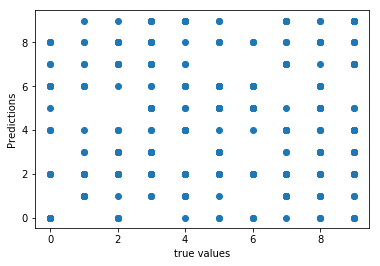

In [8]:
#visualizing result
plt.scatter(y_test,y_pred)
plt.xlabel("true values")
plt.ylabel("Predictions")
plt.show()


In [ ]:
NOTE- TRAINING TAKES SOME TIME